In [1]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
sys.path.append(git_path + "/files/shared-pyplot")
from plttools import PltTools
path_figures = git_path + "/figures/"

In [3]:
color1 = np.array([1, 0.682, 0.286])
color2 = np.array([0.008, 0.294, 0.478])
color3 = np.array([0.267, 0.647, 0.761])
color4 = np.array([0.5, 0.5, 0.5])

In [6]:
log = lammps_logfile.File("free-sampling.log")
timestep = 2

time, v_n_center, TotEng, temp = [], [], [], []
for i in [0, 1]:
    time.append(log.get("Step", run_num=i)*timestep/1000) # ps
    temp.append(log.get("Temp", run_num=i))
    TotEng.append(log.get("TotEng", run_num=i))
    v_n_center.append(log.get("v_n_center", run_num=i))

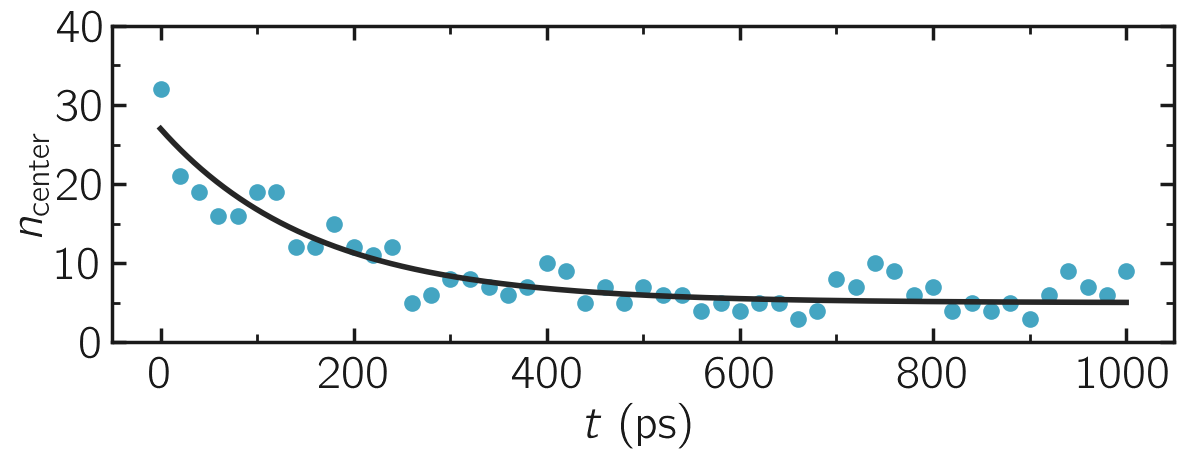

In [30]:
filename = "US-density-evolution"

# Initialise figure
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,8), dark_mode = False,
                     transparency = False, use_serif=False, n_colone=1, n_line=2)
# Panel a
myplt.add_panel()
for i in [0]:
    myplt.add_plot(x = time[i], y = v_n_center[i], type = "plot", linewidth_data = 3,
                marker = "o", data_color = color3, markersize = 12)
    
x = np.linspace(0, 1000, 1000)
myplt.add_plot(x = x, y = 22*np.exp(-x/160)+5, type = "plot", linewidth_data = 3,
            marker = "-", data_color = np.array([0.15, 0.15, 0.15]), markersize = 12)

myplt.complete_panel(ylabel = r'$n_\mathrm{center}$',
                     xlabel = r'$t~(\mathrm{ps})$', xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 1050, 200), y_ticks=np.arange(0, 41, 10),
                    x_boundaries=(-50, 1050), y_boundaries=(0, 40))

# Print figure
# myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = path_figures)